## Playing With WTA Singles Rankings Data

This notebook is sort of a playground to test out different features of the pandas library.

The data used with this notebook comes from the official WTA website: https://www.wtatennis.com/rankings/singles.

I have worked with only the top 250 players (as of yet!).

These rankings reflect the way the rankings were during early February 2024, as that was when I did this notebook.

I prepared the dataset by hand-picking the data from the website and making the csv file myself, as I found no other datasets giving me the exact same format found on the WTA website (and I needed the WTA website format).

In [ ]:
# Importing the necessary libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data

wta_rankings = pd.read_csv('wta_rankings.csv')

In [3]:
wta_rankings

,rank,player,region,age,tours,points
0,1,i swiatek,pol,22,19,9770
1,2,a sabalenka,NaN,25,16,8905
2,3,c gauff,usa,19,19,7200
3,4,j pegula,usa,29,21,5705
4,5,e rybakina,kaz,24,18,5688
...,...,...,...,...,...,...
245,246,g topalova,bul,23,31,309
246,247,m sawangkaew,tha,21,16,306
247,248,j avdeeva,NaN,21,21,306
248,249,a falei,NaN,19,16,305


In [4]:
# Checking the data types of each column

wta_rankings.dtypes

rank       int64
player    object
region    object
age        int64
tours      int64
points     int64
dtype: object

In [5]:
# Finding the 65th ranked player

wta_rankings.loc[wta_rankings['rank'] == 65]

,rank,player,region,age,tours,points
64,65,a bogdan,rou,31,22,1016


In [6]:
# Finding the mean age and standard deviation of the ages across the top 250 players

wta_rankings['age'].mean(), wta_rankings['age'].std()

(25.488, 4.322568030408545)

In [7]:
# Fill the regions that have NaN values

wta_rankings['region'] = wta_rankings['region'].fillna('xxx')

In [31]:
# Finding the number of players from each country by using groupby
# (this could have been done using valuecounts too!)

region_grouped = wta_rankings.filter(items=['region', 'player']).groupby('region').count()
region_grouped.sort_values(['player'], ascending=False)

,player
region,
xxx,31
usa,31
fra,14
cze,14
aus,13
chn,10
ukr,9
rou,9
ger,8


In [9]:
# Finding the number of players of each AGE

age_grouped = wta_rankings.filter(items=['age', 'player']).groupby('age').count()

In [10]:
age_grouped

,player
age,
16,3
18,7
19,12
20,8
21,17
22,22
23,20
24,18
25,19


<Axes: xlabel='rank', ylabel='age'>

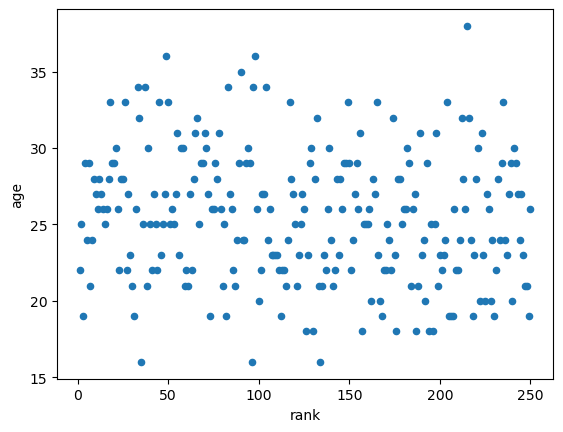

In [11]:
# Plotting a scatter plot with rankings in the x axis, and age in the y axis

wta_rankings.plot(x='rank', y='age', kind='scatter')

In [ ]:
# we can notice that there's a VERY SLIGHT negative correlation of rankings with age, i.e.,
# the younger you are, the lower your rankings are likely to be (which is what's expected)
# (age low, rank high; therefore negative correlation)

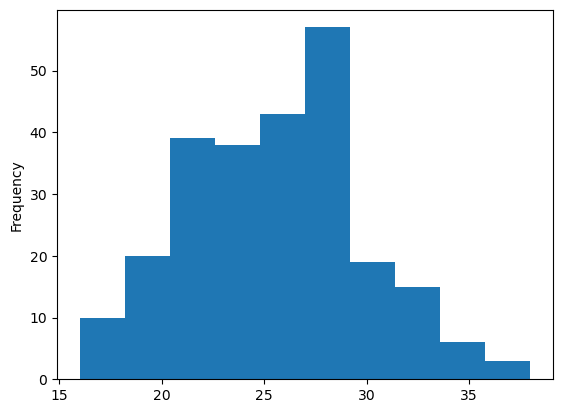

In [12]:
# Finally something more useful! A histogram of age distributions.
# Most players in the top 250 are in their mid-20s.
# We can also observe a VERY SLIGHT SKEW, with a steeper
# right tail. Fewer players in their 30's and mid 30's!

wta_rankings['age'].plot.hist();

In [13]:
# A comprehensive list of the most relevant statistical measures of central tendency of age

wta_rankings['age'].mean(), wta_rankings['age'].std(), wta_rankings['age'].median(), wta_rankings['age'].mode()

(25.488,
 4.322568030408545,
 25.0,
 0    26
 Name: age, dtype: int64)

<Axes: xlabel='rank', ylabel='tours'>

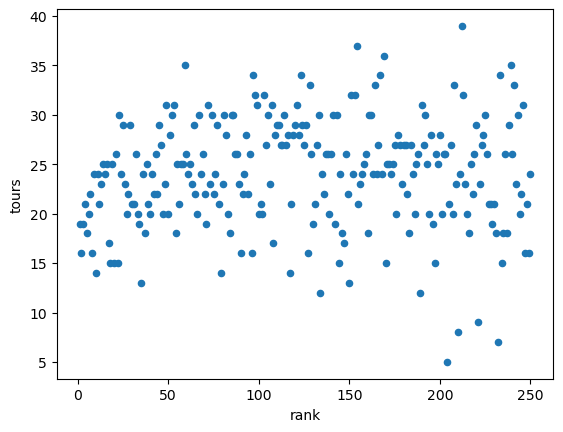

In [14]:
# Now we're making a plot with rankings and number of tournaments played.
# If we leave out the OUTLIERS, we see the rankings go lower as number of tournaments
# increases (VERY SLIGHT positive correlation). More experience means your rank is
# liable to go down. Hmmm....

wta_rankings.plot(x='rank', y='tours', kind='scatter')

In [15]:
# Now we're checking the average age and points of EACH COUNTRY.

region_grouped_2 = wta_rankings.filter(items=['region', 'age', 'points']).groupby('region').mean()
region_grouped_2

,age,points
region,,
arg,23.000000,626.800000
aus,25.307692,467.692308
aut,24.000000,563.000000
bel,29.333333,1187.333333
bra,28.000000,1768.000000
bul,25.500000,663.000000
can,26.000000,583.666667
chn,24.100000,1128.200000
col,22.500000,667.500000


In [23]:
len(region_grouped_2)

49

In [16]:
region_grouped_2.index

Index(['arg', 'aus', 'aut', 'bel', 'bra', 'bul', 'can', 'chn', 'col', 'cro',
       'cyp', 'cze', 'den', 'egy', 'esp', 'est', 'fra', 'gbr', 'ger', 'gre',
       'hun', 'ind', 'ita', 'jpn', 'kaz', 'kor', 'lat', 'ltu', 'mex', 'mkd',
       'mne', 'ned', 'phi', 'pol', 'por', 'rou', 'slo', 'srb', 'sui', 'svk',
       'swe', 'tha', 'tpe', 'tun', 'tur', 'ukr', 'usa', 'uzb', 'xxx'],
      dtype='object', name='region')

In [20]:
# We're sorting countries based on POINTS here!
# Tunisia comes out first, but this is misleading, because tunisia
# has only ONE player in the top 250 rankings (We made this revelation just 
# below this cell). Wonderful demonstration of how data can lead you
# to the wrong kind of conclusions.

region_grouped_2.sort_values(by=['points'], ascending=False)

,age,points
region,,
tun,29.000000,4076.000000
kaz,26.500000,3333.000000
pol,27.500000,3119.750000
lat,23.500000,2048.000000
bra,28.000000,1768.000000
cze,24.285714,1515.785714
gre,28.000000,1462.333333
xxx,23.516129,1237.870968
bel,29.333333,1187.333333


In [18]:
wta_rankings[wta_rankings['region'] == 'tun']

,rank,player,region,age,tours,points
5,6,o jabeur,tun,29,20,4076


In [21]:
wta_rankings.head()

,rank,player,region,age,tours,points
0,1,i swiatek,pol,22,19,9770
1,2,a sabalenka,xxx,25,16,8905
2,3,c gauff,usa,19,19,7200
3,4,j pegula,usa,29,21,5705
4,5,e rybakina,kaz,24,18,5688


<Axes: ylabel='Frequency'>

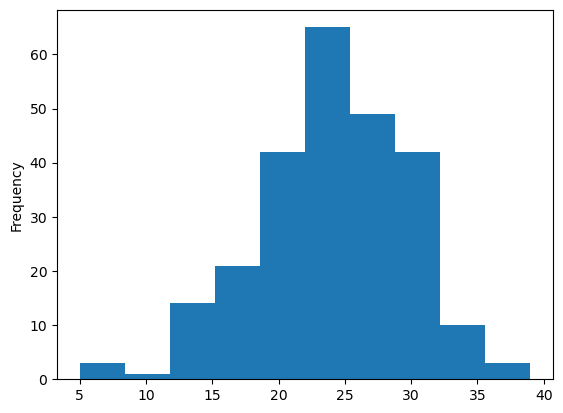

In [22]:
# Plain old histogram of tournaments played.
# The distribution is approximately normal.
wta_rankings['tours'].plot.hist()

In [29]:
# How many minors are in the top 250?
# (Kudos to them)

wta_rankings[wta_rankings['age'] < 18]

,rank,player,region,age,tours,points
34,35,m andreeva,xxx,16,13,1408
95,96,b fruhvirtova,cze,16,16,774
133,134,a korneeva,xxx,16,12,555
